In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

%matplotlib inline

In [0]:
T = 10
D = 1
X = []
Y = []


def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x,-1,-2,-3) # short term distance.
    #y = get_label(x, 1, 2, 3)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [3]:
# Try linear model which will fail since the decision boundary is not linear
i = Input(shape=(T,))
x = Dense(1,activation='sigmoid')(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(X,Y,epochs=100,validation_split = 0.5)


Epoch 1/100
79/79 [==============================] - 0s 6ms/step - loss: 0.2751 - accuracy: 0.5020 - val_loss: 0.2534 - val_accuracy: 0.5032
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.5128 - val_loss: 0.2503 - val_accuracy: 0.5068
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.5184 - val_loss: 0.2501 - val_accuracy: 0.5208
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.5104 - val_loss: 0.2501 - val_accuracy: 0.5164
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.5076 - val_loss: 0.2497 - val_accuracy: 0.5056
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.5148 - val_loss: 0.2500 - val_accuracy: 0.5168
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.5120 - val_loss: 0.2502 - val_accuracy: 0.5208
Epoch 8/100
7

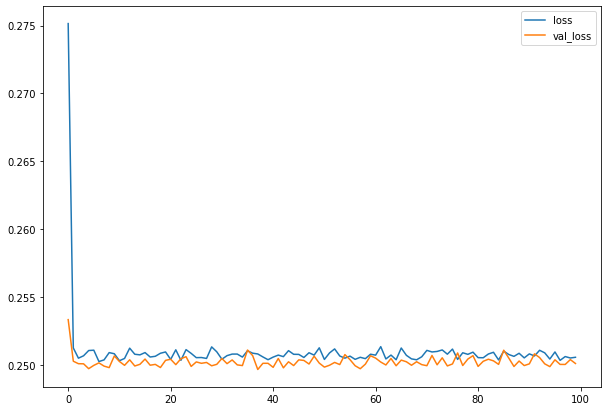

In [4]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

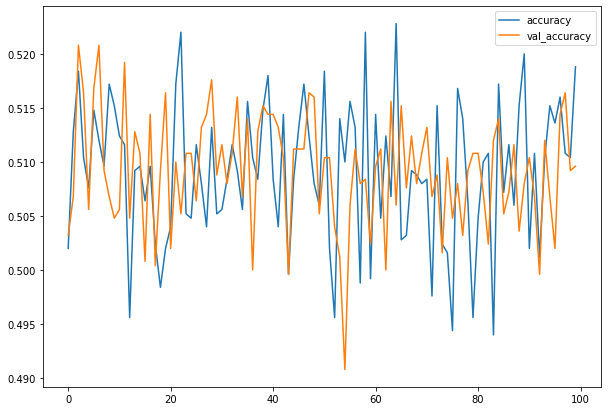

In [5]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [6]:
# Trying simple RNN
X = np.expand_dims(X,-1)
i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(X,Y,epochs=100,validation_split=0.5)

Epoch 1/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5516 - val_loss: 0.6883 - val_accuracy: 0.5524
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.5820 - val_loss: 0.6579 - val_accuracy: 0.6456
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6263 - accuracy: 0.6960 - val_loss: 0.5941 - val_accuracy: 0.7440
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.7624 - val_loss: 0.5383 - val_accuracy: 0.7716
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.5121 - accuracy: 0.7740 - val_loss: 0.4909 - val_accuracy: 0.7888
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.4535 - accuracy: 0.8140 - val_loss: 0.4078 - val_accuracy: 0.8364
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.3662 - accuracy: 0.8580 - val_loss: 0.3189 - val_accuracy: 0.8848
Epoch 8/100
7

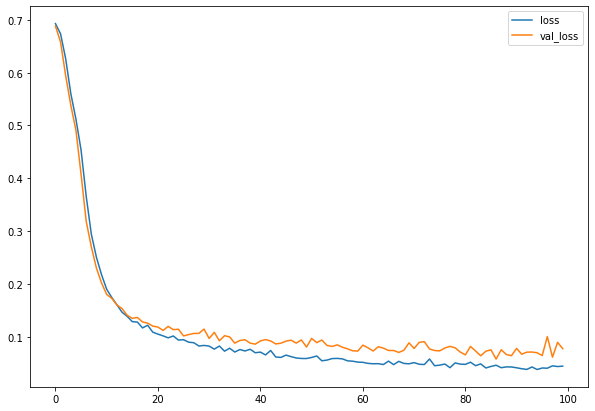

In [7]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

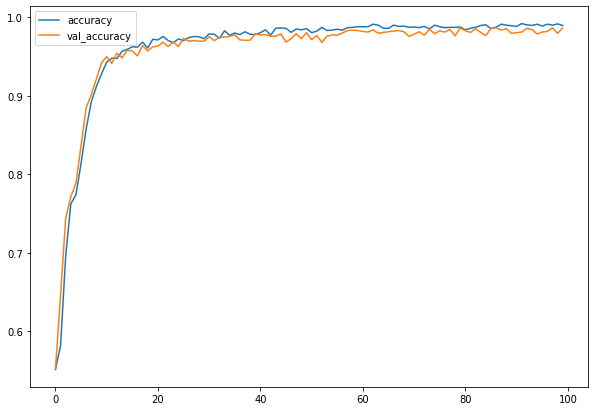

In [8]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

## Long term dependencies

In [0]:
T = 10
D = 1
X = []
Y = []


def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    #y = get_label(x,-1,-2,-3) # short term distance.
    y = get_label(x, 1, 2, 3)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [10]:
# Trying simple RNN
X = np.expand_dims(X,-1)
i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(X,Y,epochs=100,validation_split=0.5)

Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 0.7042 - accuracy: 0.5092 - val_loss: 0.6943 - val_accuracy: 0.5172
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5304 - val_loss: 0.6919 - val_accuracy: 0.5224
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.5320 - val_loss: 0.6896 - val_accuracy: 0.5428
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6853 - accuracy: 0.5492 - val_loss: 0.6878 - val_accuracy: 0.5428
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5632 - val_loss: 0.7119 - val_accuracy: 0.5572
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5684 - val_loss: 0.6843 - val_accuracy: 0.5664
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6725 - accuracy: 0.5760 - val_loss: 0.6732 - val_accuracy: 0.5808
Epoch 8/100
7

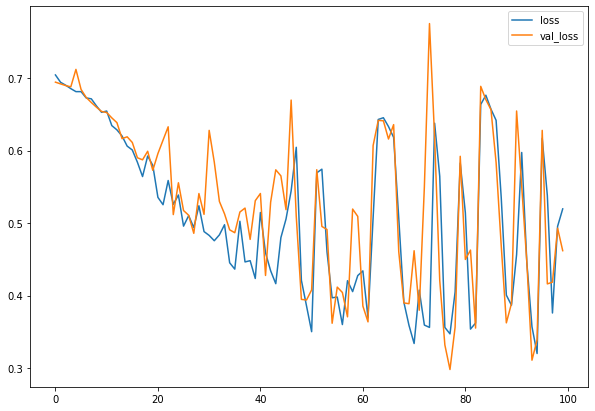

In [11]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

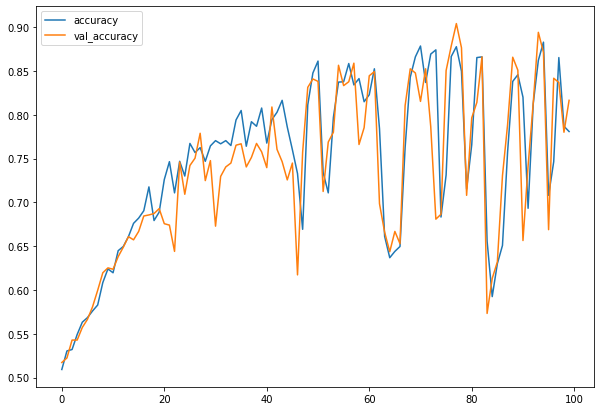

In [12]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [13]:
# Trying LSTM
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(X,Y,epochs=100,validation_split=0.5)

Epoch 1/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6940 - accuracy: 0.4840 - val_loss: 0.6939 - val_accuracy: 0.4828
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6937 - accuracy: 0.5084 - val_loss: 0.6926 - val_accuracy: 0.5188
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6938 - accuracy: 0.4996 - val_loss: 0.6940 - val_accuracy: 0.4812
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6940 - accuracy: 0.5028 - val_loss: 0.6936 - val_accuracy: 0.4812
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.5036 - val_loss: 0.6931 - val_accuracy: 0.5156
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5028 - val_loss: 0.6936 - val_accuracy: 0.4812
Epoch 7/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.4844 - val_loss: 0.6931 - val_accuracy: 0.5228
Epoch 8/100


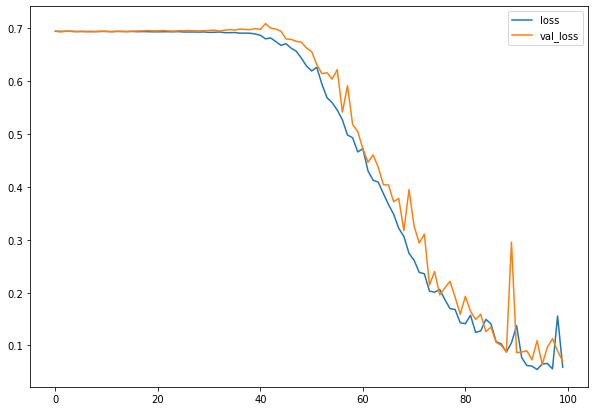

In [14]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

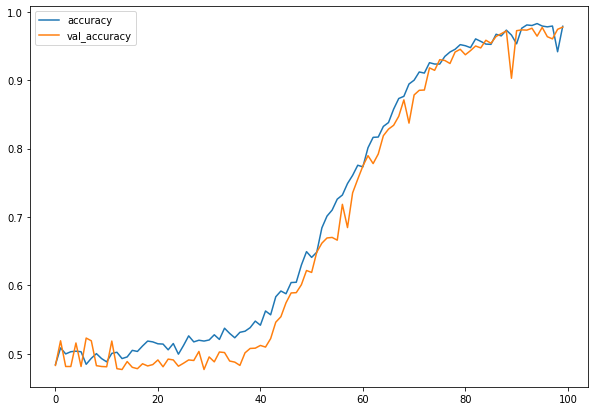

In [15]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

## Using bigger sequences

In [0]:
T = 20
D = 1
X = []
Y = []


def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    #y = get_label(x,-1,-2,-3) # short term distance.
    y = get_label(x, 1, 2, 3)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [17]:
# Trying simple RNN
X = np.expand_dims(X,-1)
i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(X,Y,epochs=100,validation_split=0.5)

Epoch 1/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6998 - accuracy: 0.5052 - val_loss: 0.6991 - val_accuracy: 0.4792
Epoch 2/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6960 - accuracy: 0.4940 - val_loss: 0.6974 - val_accuracy: 0.4772
Epoch 3/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5184 - val_loss: 0.6982 - val_accuracy: 0.4856
Epoch 4/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5124 - val_loss: 0.6934 - val_accuracy: 0.5052
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5128 - val_loss: 0.6953 - val_accuracy: 0.4912
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5232 - val_loss: 0.6964 - val_accuracy: 0.4928
Epoch 7/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5160 - val_loss: 0.6971 - val_accuracy: 0.4988
Epoch 8/100
7

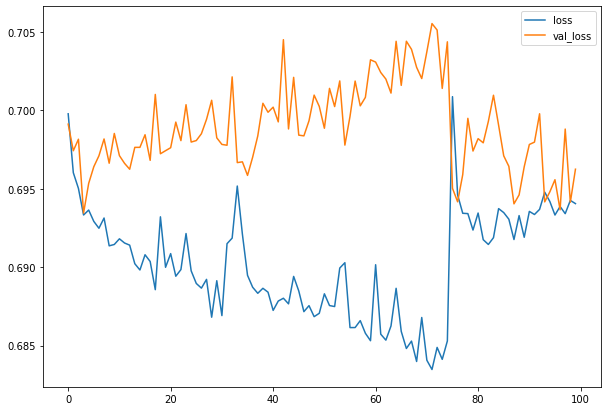

In [18]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

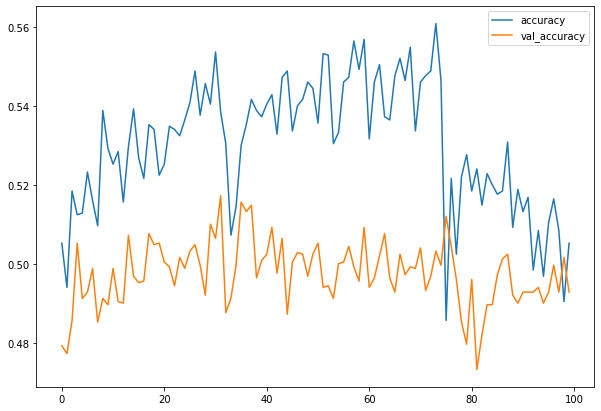

In [19]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [20]:
# Trying LSTM
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(X,Y,epochs=400,validation_split=0.5)

Epoch 1/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6953 - accuracy: 0.4996 - val_loss: 0.6940 - val_accuracy: 0.4896
Epoch 2/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5132 - val_loss: 0.6948 - val_accuracy: 0.4832
Epoch 3/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6926 - accuracy: 0.5108 - val_loss: 0.6985 - val_accuracy: 0.4928
Epoch 4/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6931 - accuracy: 0.5160 - val_loss: 0.6929 - val_accuracy: 0.5036
Epoch 5/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5196 - val_loss: 0.6935 - val_accuracy: 0.5052
Epoch 6/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6928 - accuracy: 0.5144 - val_loss: 0.6946 - val_accuracy: 0.4964
Epoch 7/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6933 - accuracy: 0.5036 - val_loss: 0.6946 - val_accuracy: 0.4924
Epoch 

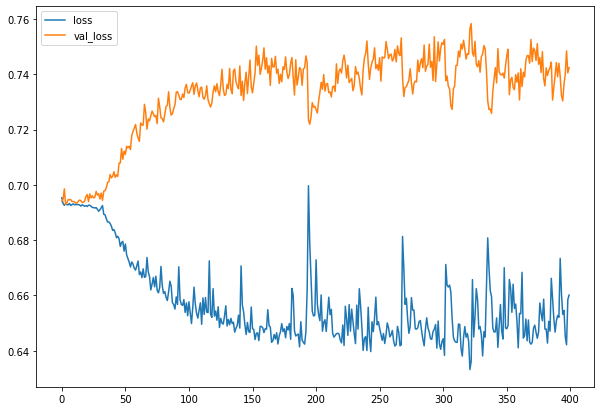

In [21]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

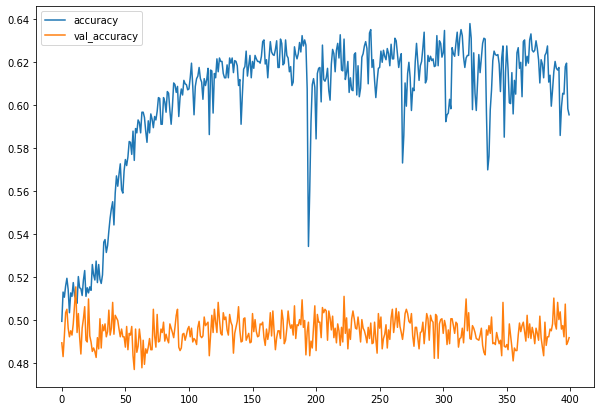

In [22]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# LSTMs with even longer sequences

In [0]:
T = 30
D = 1
X = []
Y = []


def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    #y = get_label(x,-1,-2,-3) # short term distance.
    y = get_label(x, 1, 2, 3)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [24]:
# Trying LSTM
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(X,Y,epochs=400,validation_split=0.5)

Epoch 1/400
79/79 [==============================] - 2s 23ms/step - loss: 0.6948 - accuracy: 0.5028 - val_loss: 0.6924 - val_accuracy: 0.5204
Epoch 2/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6941 - accuracy: 0.4984 - val_loss: 0.6923 - val_accuracy: 0.5196
Epoch 3/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6944 - accuracy: 0.4828 - val_loss: 0.6923 - val_accuracy: 0.5208
Epoch 4/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6937 - accuracy: 0.4892 - val_loss: 0.6927 - val_accuracy: 0.5128
Epoch 5/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6936 - accuracy: 0.5076 - val_loss: 0.6933 - val_accuracy: 0.5028
Epoch 6/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6936 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.5152
Epoch 7/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6930 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.5024
Epoch 

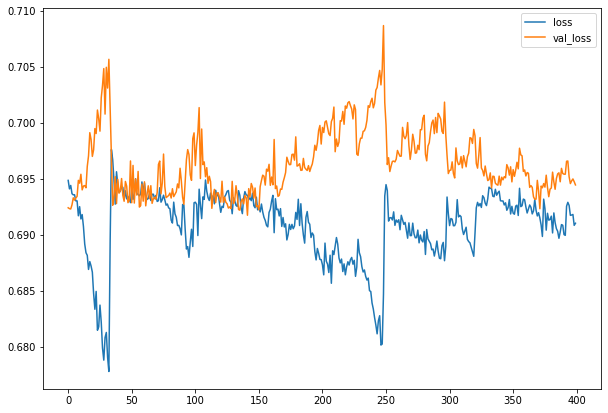

In [25]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

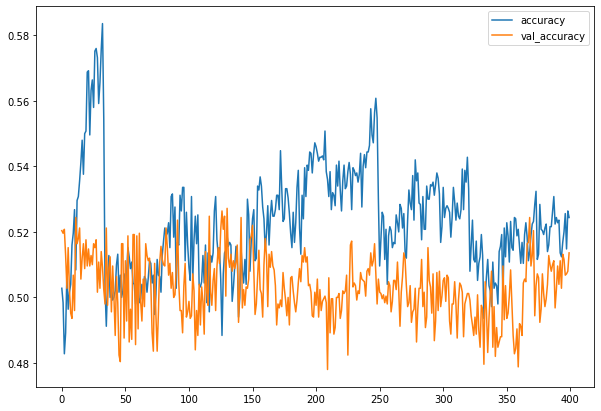

In [26]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [27]:
# Trying LSTM
i = Input(shape=(T,D))
x = LSTM(5,return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(X,Y,epochs=200,validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 2s 20ms/step - loss: 0.6950 - accuracy: 0.5068 - val_loss: 0.6926 - val_accuracy: 0.5276
Epoch 2/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6927 - accuracy: 0.5180 - val_loss: 0.6931 - val_accuracy: 0.4856
Epoch 3/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6926 - accuracy: 0.5140 - val_loss: 0.6941 - val_accuracy: 0.4852
Epoch 4/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6923 - accuracy: 0.5124 - val_loss: 0.6924 - val_accuracy: 0.5200
Epoch 5/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6912 - accuracy: 0.5260 - val_loss: 0.6918 - val_accuracy: 0.5232
Epoch 6/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6901 - accuracy: 0.5412 - val_loss: 0.6947 - val_accuracy: 0.5004
Epoch 7/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6866 - accuracy: 0.5460 - val_loss: 0.6918 - val_accuracy: 0.5112
Epoch 

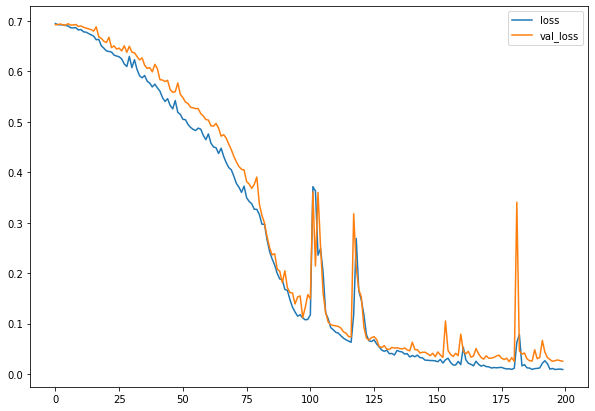

In [28]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

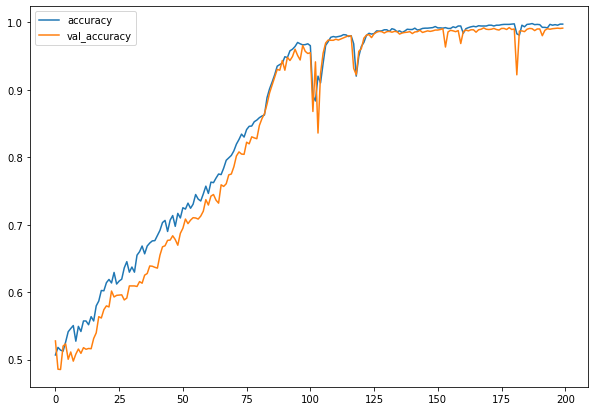

In [29]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

## Increasing the number of units for LSTM

In [30]:
# Trying LSTM
i = Input(shape=(T,D))
x = LSTM(10)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(X,Y,epochs=200,validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 2s 20ms/step - loss: 0.6942 - accuracy: 0.4972 - val_loss: 0.6955 - val_accuracy: 0.4756
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5176
Epoch 3/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6939 - accuracy: 0.4856 - val_loss: 0.6937 - val_accuracy: 0.4896
Epoch 4/200
79/79 [==============================] - 1s 19ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6926 - val_accuracy: 0.5188
Epoch 5/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6935 - accuracy: 0.4896 - val_loss: 0.6930 - val_accuracy: 0.5232
Epoch 6/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6934 - accuracy: 0.4968 - val_loss: 0.6928 - val_accuracy: 0.5140
Epoch 7/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6933 - accuracy: 0.5048 - val_loss: 0.6926 - val_accuracy: 0.5124
Epoch 

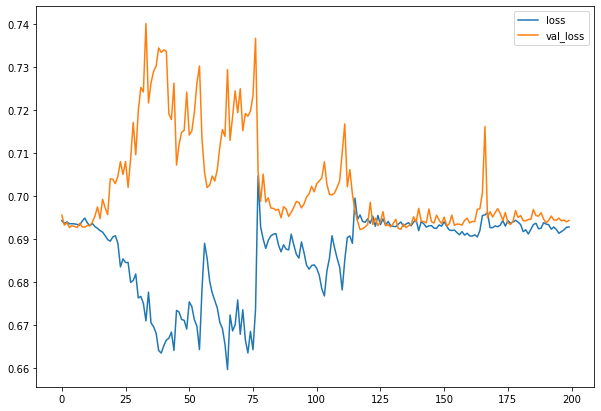

In [31]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

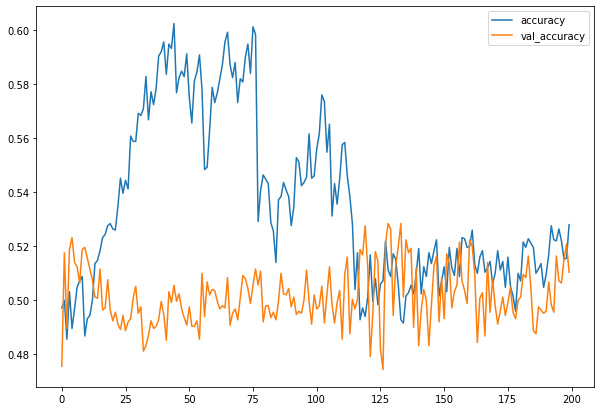

In [32]:
plt.figure(figsize=(10,7))
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()